# Rain data preparation and unit testing (Pmast and KNMI)

## Setup and fetch data

In [1]:
# Settings
Username   = 'Beheerder'
years      = range(2001,2021)    #(1997,2021) # Set years to download

In [2]:
import os
datapath = os.path.join('../')
#print('datapath is set to %s'%datapath)

# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install plotly 
# !pip install cufflinks
#!pip install colorspacious
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
#import cufflinks as cf
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib import cm
#from colorspacious import cspace_converter
import scipy.stats as stats
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

from datetime import datetime, timedelta
import sys
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
from Loobos_Toolbox import dateparse, dateparse_Gapfilled, Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile
from Ags_model import runAgs, calc_LE
import matplotlib.dates as mdates

In [3]:
#these next two lines are to prevent re-loading the data. If you want to re-load data, instead comment them out
if not 'progress' in globals(): progress = list()
if not 'dataloaded' in progress:
  # Read files
    df_meteo        = Read_Loobos_meteo      (years,datapath)
    progress.append('dataloaded')

Loading 2001


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013
Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015
Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_meteo loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'S(i)', 'S(o)', 'L(i)', 'L(o)', 'G1', 'PAR',
       'H2OLic', 'CO2Lic', '-q', 'Te(vaisal)', 'Te-L(i)', 'Te-L(o)', '-u(z)',
       '-u(dir)', 'Min u(z)', 'WSC therm', 'SD S(i)', 'SD S(o)', 'SD L(i)',
       'SD L(o)', 'SD G1', 'SD PAR', 'SD H2OLic', 'SD CO2Lic', 'SD q',
       'SD Te(vaisal)', 'Battery V', 'CR10 temp', 'P(mast)00', 'P(guter)00',
       'P(mast)05', 'P(guter)05', 'P(mast)10', 'P(guter)10', 'P(mast)15',
       'P(guter)15', 'P(mast)20', 'P(guter)20', 'P(mast)25', 'P(guter)25',
       'P(mast)', 'P(guter)', 'P(field)', 'L(i)corr', 'L(o)corr', 'R(net)',
       'P(guter)corr', 'Pcorr', 'PARrefl', 'PARdiff', 'H2Olic', 'CO2lic',
       'Vbatt', 'CR10temp', 'SD u(z)', '#NAME?', '#NAME?.1', '#NAME?.2'],
      dtype='object')


### KNMI fetch data

<Axes: xlabel='date'>

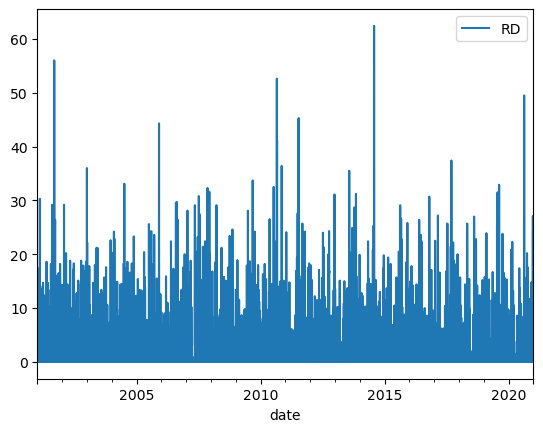

In [11]:
#datapath = os.path.join('../KNMI_regen')
#print(datapath)
knmi_regen=pd.read_csv('../KNMI_regen/neerslaggeg_KOOTWIJK-RADIO_567.txt',sep=',',header=17)
knmi_regen=knmi_regen.iloc[28000:] #remove dataset before ~ 2001 to speed up calculations
#knmi_regen=knmi_regen.iloc[31000:] #remove dataset before ~november 2007
knmi_regen['date']=pd.to_datetime(knmi_regen['YYYYMMDD'],yearfirst=True,format='%Y%m%d')
knmi_regen.index=knmi_regen['date']
knmi_regen=knmi_regen.rename(columns={"   RD": "RD", "   SX": "SX"}) #for some reason there's spaces in some of the column names, removing them.
knmi_regen=knmi_regen.astype({"RD": np.intc}) #Column RD is is rain daily sum, SX is code related to snow. If unnamed contains 4 spaces it's also a code for snow. STN is station ID.
years_range=(str(list(years)[0])+'-01-01',str(list(years)[-1])+'-12-31') #daterange based on the years variable defined at the top
df_knmi_daily=knmi_regen.loc[years_range[0]:years_range[1],['RD']]/10 #RD is in tenths of mm so divide by 10
#df_knmi_daily.plot()

## Cleanup data and Calculations

### P(mast) Rain data

In [4]:
#df_meteo.columns
#'P(guter)','P(guter)00', 'P(guter)05', 'P(guter)10','P(guter)15','P(guter)20', 'P(guter)25',
#'P(mast)','P(mast)00','P(mast)05', 'P(mast)10', 'P(mast)15','P(mast)20','P(mast)25'
#'P(field)',
#'P(guter)corr',
#'Pcorr'

<Axes: >

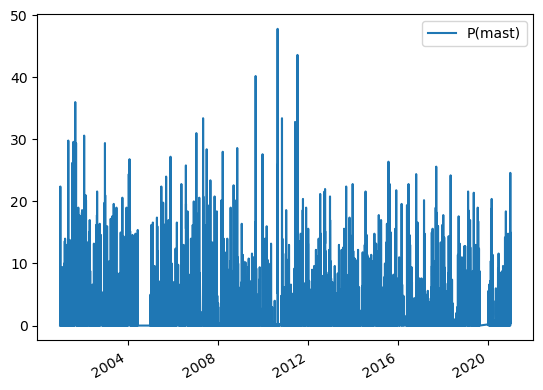

In [5]:
df_Pmast = df_meteo[['P(mast)']]
df_Pmast_daily = df_Pmast.resample('1D').sum(min_count=1) #min_count makes the NaN entries become NaN in the sum, otherwise they are 0
df_Pmast_8to8 = df_Pmast.resample('1D', offset=pd.Timedelta('8H')).sum(min_count=1) #this sets it so it's 8:00 to the following day 8:00
df_Pmast_8to8.index=df_Pmast_8to8.index.floor('1D') #remove the 8:00 timestamp on the index
df_Pmast_8to8.index=df_Pmast_8to8.index.shift(freq='1D')

df_Pmast=df_Pmast.dropna()
df_Pmast_daily=df_Pmast_daily.dropna()
df_Pmast_8to8=df_Pmast_8to8.dropna()

df_Pmast_8to8.plot()

In [6]:
#big gaps where there is significant knmi signal but no pmast (for making a quality flag)
#quality flag, 1=most reliable, 2=not reliable
#2001 is good
df_Pmast_8to8['Pmast_qc']=np.nan
df_Pmast_8to8.loc[(df_Pmast_8to8.index.month>=4) & (df_Pmast_8to8.index.month<=10),'Pmast_qc']=1

df_Pmast_8to8.loc['2002-06-13':'2002-07-02','Pmast_qc']=2
df_Pmast_8to8.loc['2003-05-01':'2003-05-06','Pmast_qc']=2
df_Pmast_8to8.loc['2004-06-17':'2004-10-31','Pmast_qc']=2
df_Pmast_8to8.loc['2008-08-02':'2008-09-01','Pmast_qc']=2
df_Pmast_8to8.loc['2010-06-06':'2010-08-26','Pmast_qc']=2
df_Pmast_8to8.loc['2010-09-07':'2010-10-27','Pmast_qc']=2
#2011 is good
#2012 is good
df_Pmast_8to8.loc['2013-09-04':'2013-10-15','Pmast_qc']=2
df_Pmast_8to8.loc['2014-04-26':'2014-05-29','Pmast_qc']=2
#2015 is good
df_Pmast_8to8.loc['2016-04-01':'2016-05-15','Pmast_qc']=2
#2017 is good
df_Pmast_8to8.loc['2018-06-08':'2018-06-10','Pmast_qc']=2
df_Pmast_8to8.loc['2019-08-13':'2019-10-31','Pmast_qc']=2
#2020 is good

### Pmast days since rain calculation

In [7]:
df_Pmast_8to8['index_shift'] = df_Pmast_8to8.index.shift(freq='1D')
df_Pmast_8to8['timestep']=df_Pmast_8to8['index_shift']-df_Pmast_8to8.index
df_Pmast_8to8['is_1d']=df_Pmast_8to8['timestep']==pd.Timedelta(days=1)
df_Pmast_8to8['days_since_rain']=np.nan #init the new column for assignment

counter=0
for index, row in df_Pmast_8to8.iterrows():
    if row['P(mast)']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        df_Pmast_8to8.loc[index,'days_since_rain']=counter
    else: #rain is zero, keep counting up
        if row['is_1d']: #if true, then timedelta is 1 and you keep going, otherwise there's a gap in data and rest to 0
            counter=counter+1
            df_Pmast_8to8.loc[index,'days_since_rain']=counter              
        else: #there is a gap in the data, previous entry not one day before, reset counter to 0
            counter=0
            df_Pmast_8to8.loc[index,'days_since_rain']=counter

df_Pmast_8to8=df_Pmast_8to8.drop(['index_shift','timestep','is_1d'],axis=1) #drop unneeded columns

In [8]:
df_Pmast_8to8.to_csv('./Pmast_8to8.csv')

In [9]:
#pd.set_option('display.max_rows', None)
#df_Pmast.loc['2004-06-13':'2005-01-01','P(mast)']

#pd.set_option('display.max_rows', None)
#df_Pmast.loc['2019-08-09':'2020-01-02','P(mast)']

In [10]:
#Compare different Rain data from df_meteo
#still WIP 

### KNMI Rain import

### KNMI days since rain calculation

In [13]:
df_knmi_daily['index_shift'] = df_knmi_daily.index.shift(freq='1D')
df_knmi_daily['timestep']=df_knmi_daily['index_shift']-df_knmi_daily.index
df_knmi_daily['is_1d']=df_knmi_daily['timestep']==pd.Timedelta(days=1)
df_knmi_daily['days_since_rain']=np.nan #init the new column for assignment

counter=0
for index, row in df_knmi_daily.iterrows():
    if row['RD']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        df_knmi_daily.loc[index,'days_since_rain']=counter
    else: #rain is zero, keep counting up
        if row['is_1d']: #if true, then timedelta is 1 and you keep going, otherwise there's a gap in data and rest to 0
            counter=counter+1
            df_knmi_daily.loc[index,'days_since_rain']=counter        
        else: #there is a gap in the data, previous entry not one day before, reset counter to 0
            counter=0
            df_knmi_daily.loc[index,'days_since_rain']=counter

df_knmi_daily=df_knmi_daily.drop(['index_shift','timestep','is_1d'],axis=1) #drop unneeded columns

In [14]:
df_knmi_daily.to_csv('./knmi_rain_daily.csv')

### Manual check for missing day rows

In [15]:
def check_continuous(df, freq):
    df['index_shift'] = df.index.shift(freq=freq)
    df['timestep'] = df['index_shift'] - df.index
    df['is_timestep'] = df['timestep']==pd.Timedelta(freq)
    return df.loc[df['is_timestep']==False]

In [16]:
#check_continuous(df_knmi_daily,'1D')
#check_continuous(df_Pmast_daily,'1D')
#check_continuous(df_Pmast,'30min')

## Visualize difference in pmast and knmi

In [17]:
#df_Pmast_8to8.loc['2003-05-01':'2003-05-06',['P(mast)']]
#df_knmi_daily.loc['2003-05-01':'2003-05-06',['RD']]

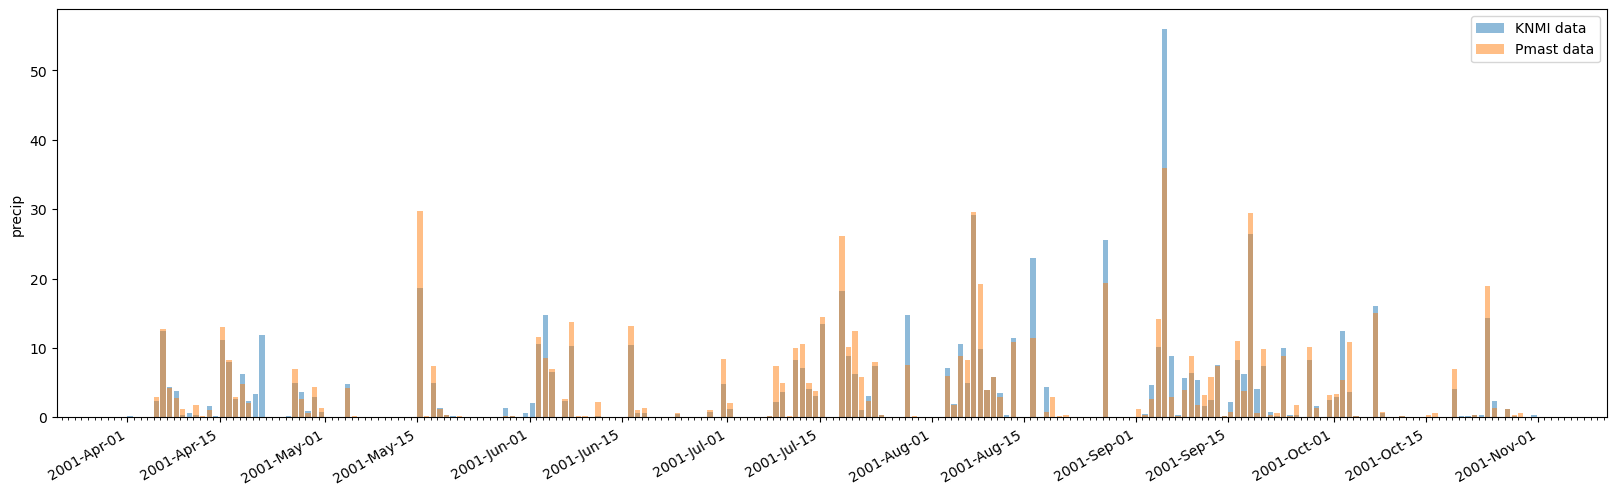

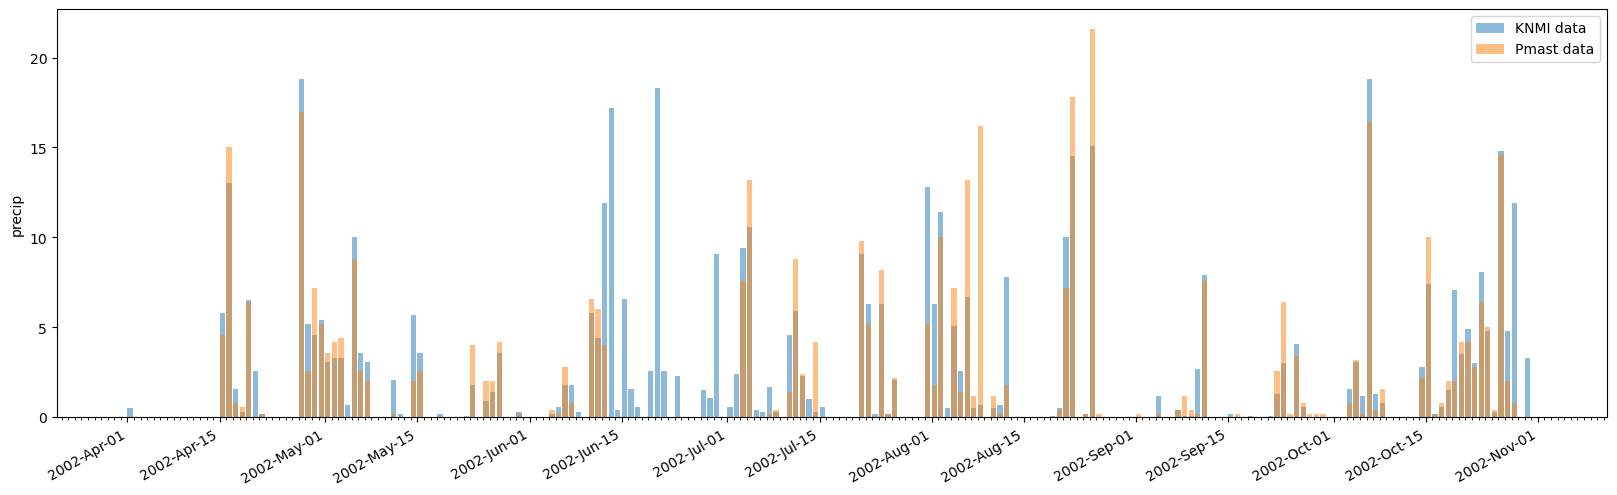

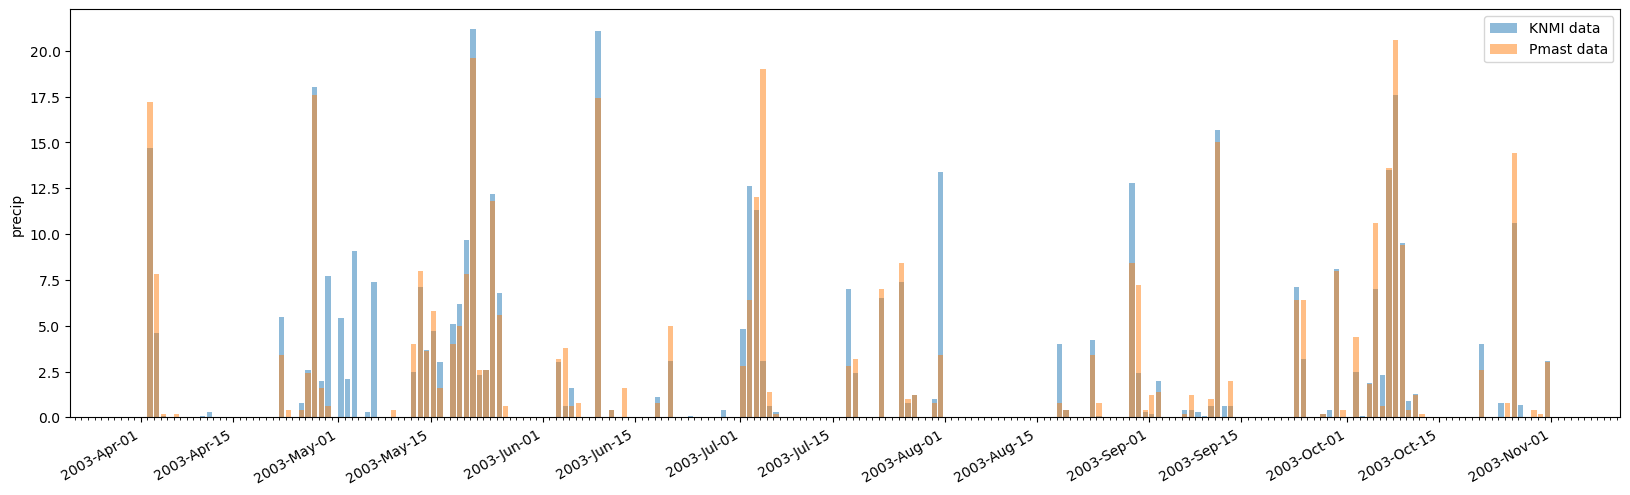

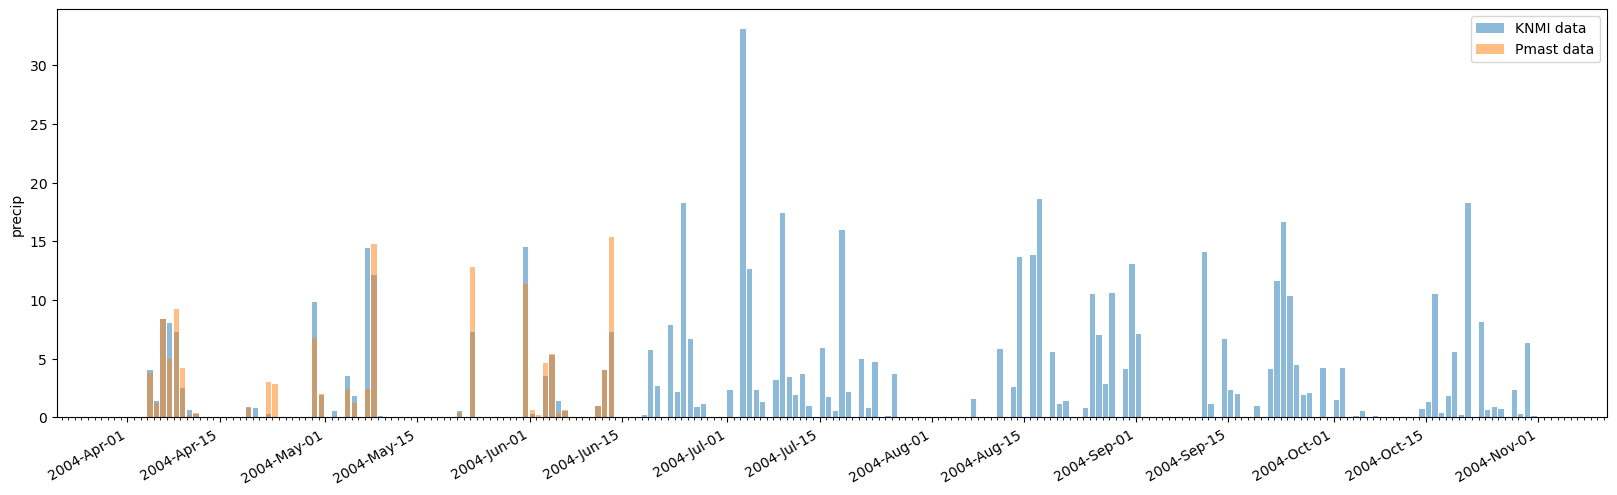

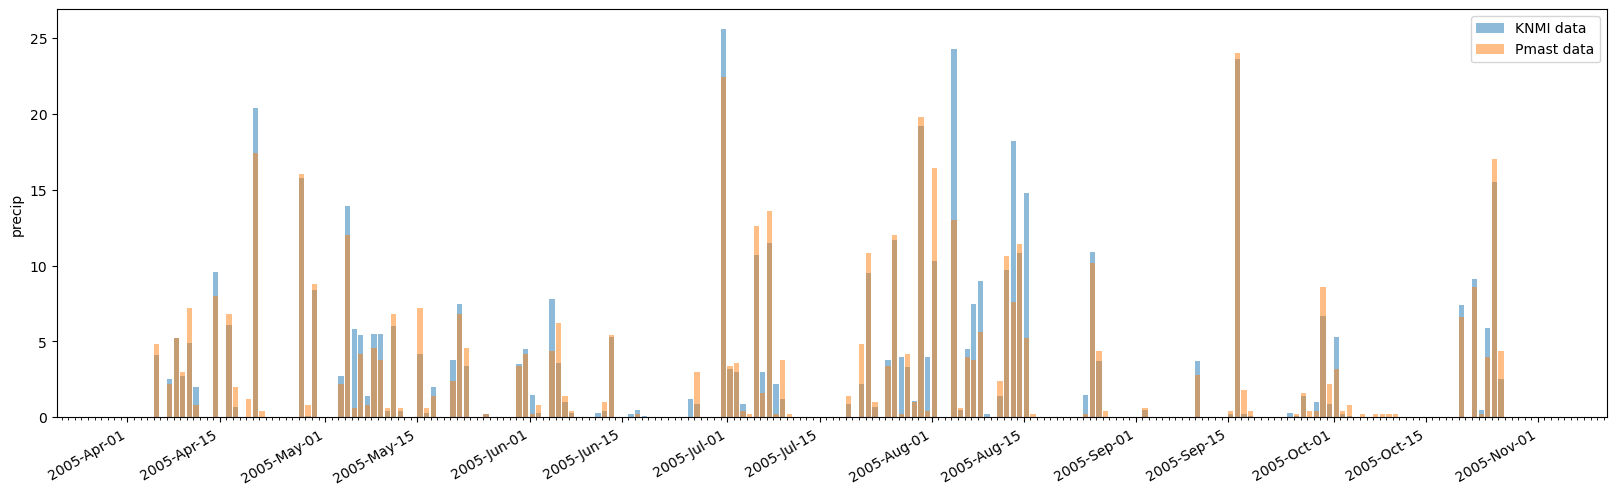

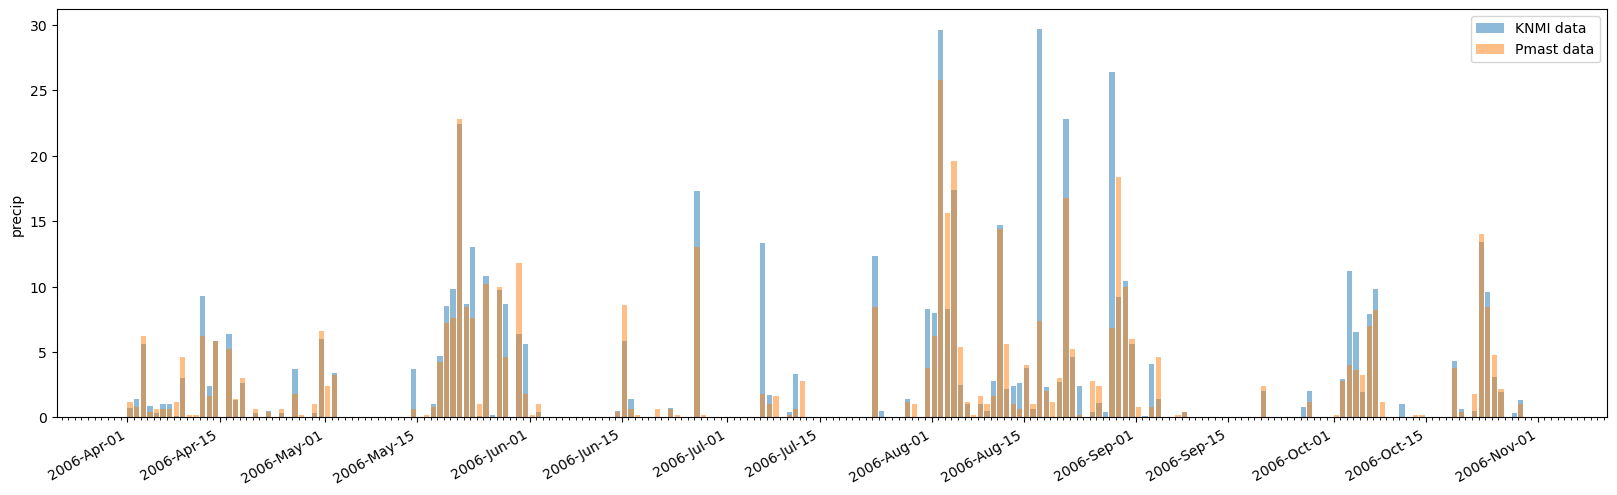

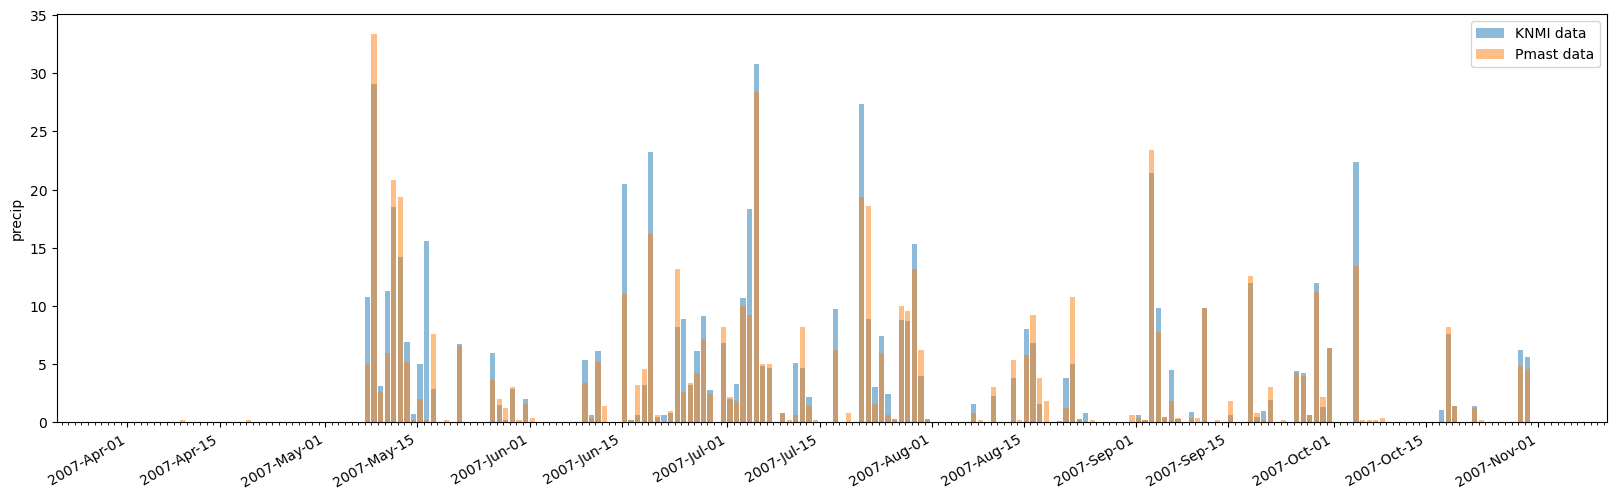

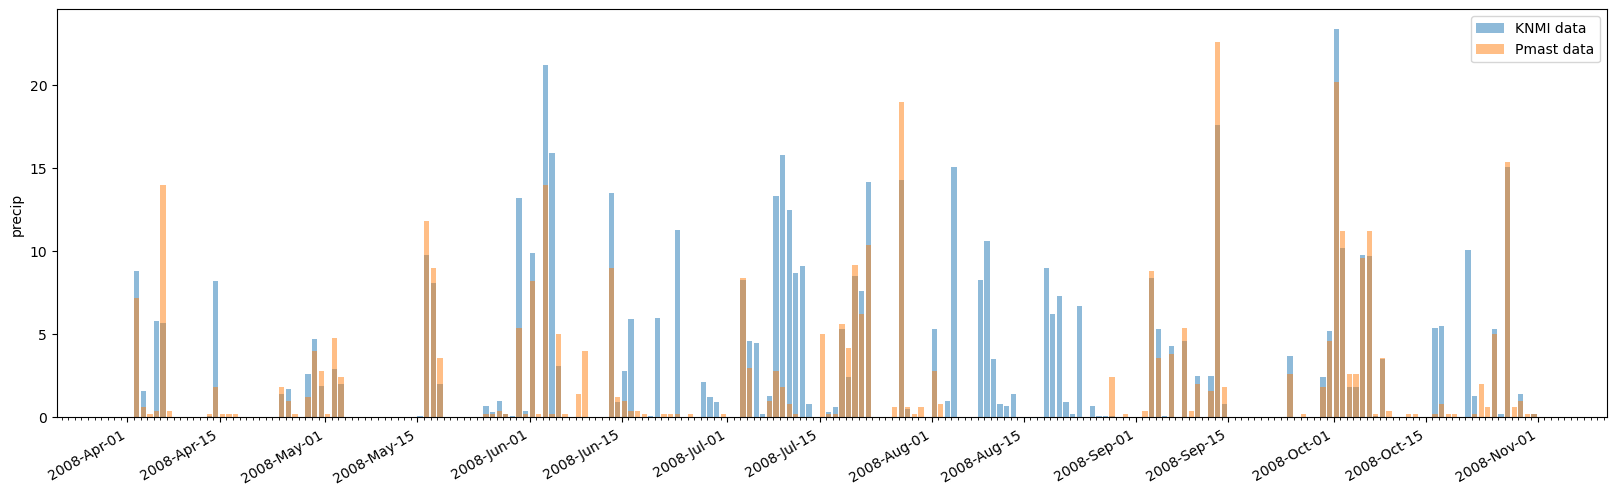

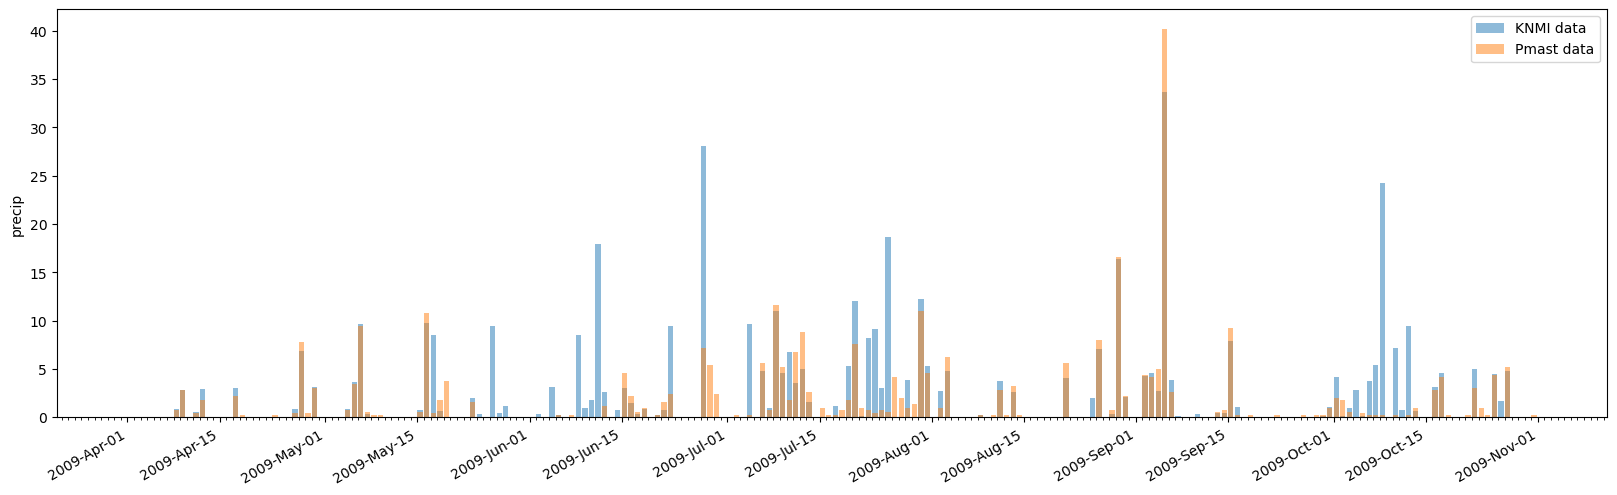

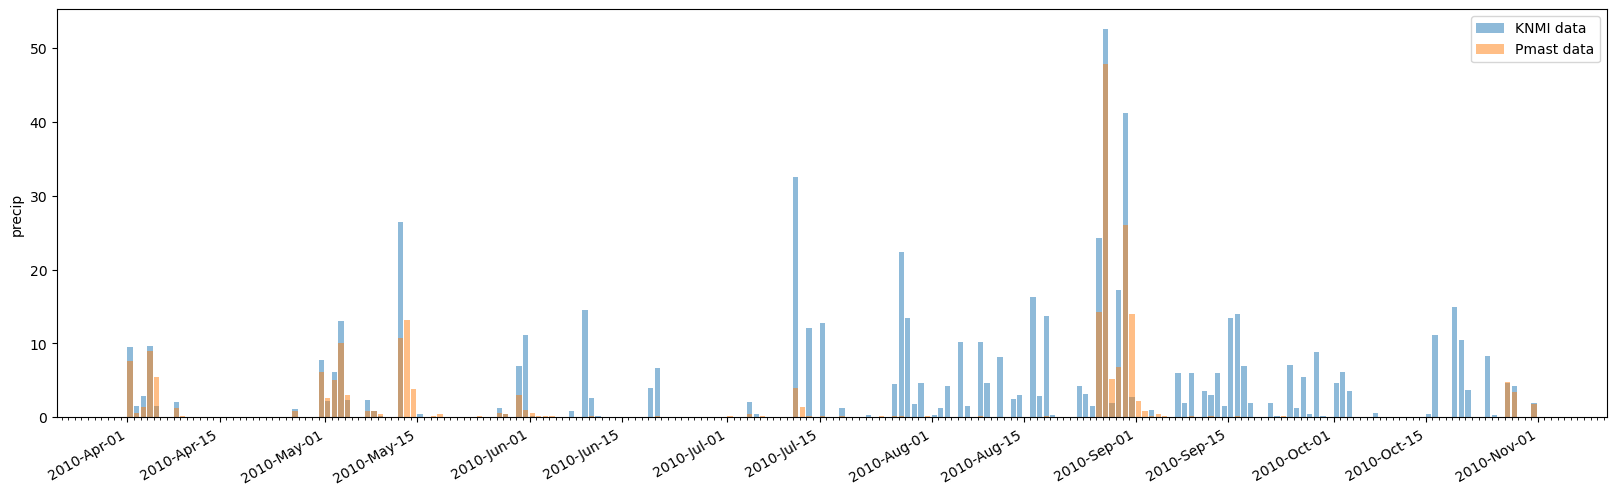

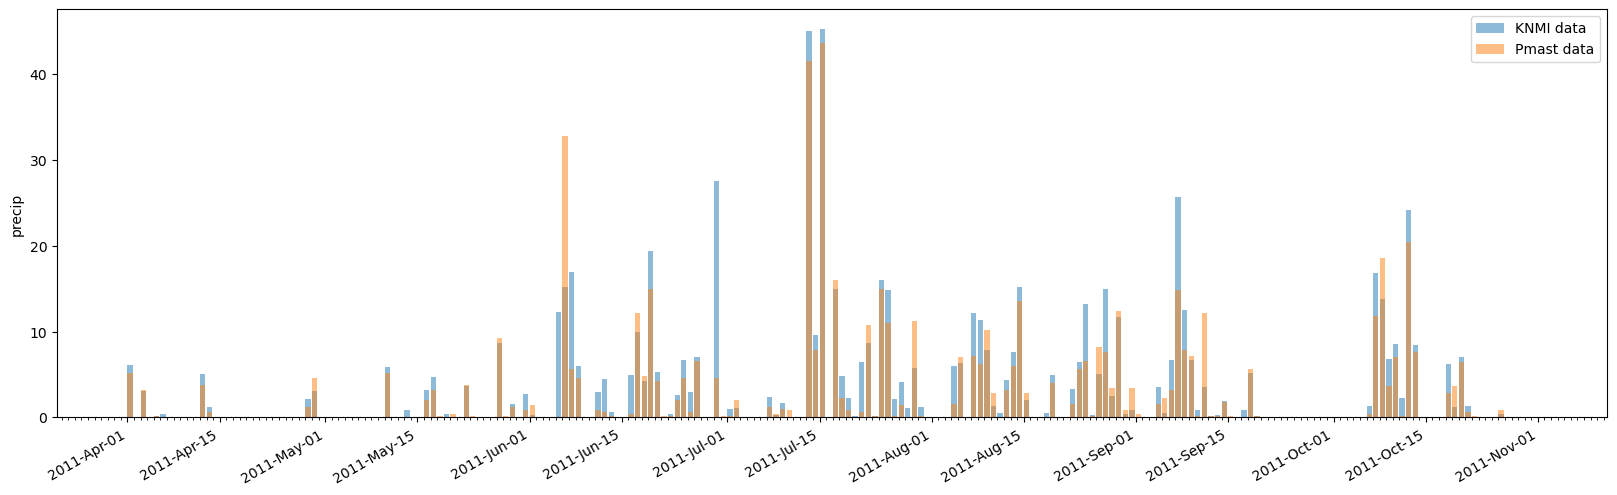

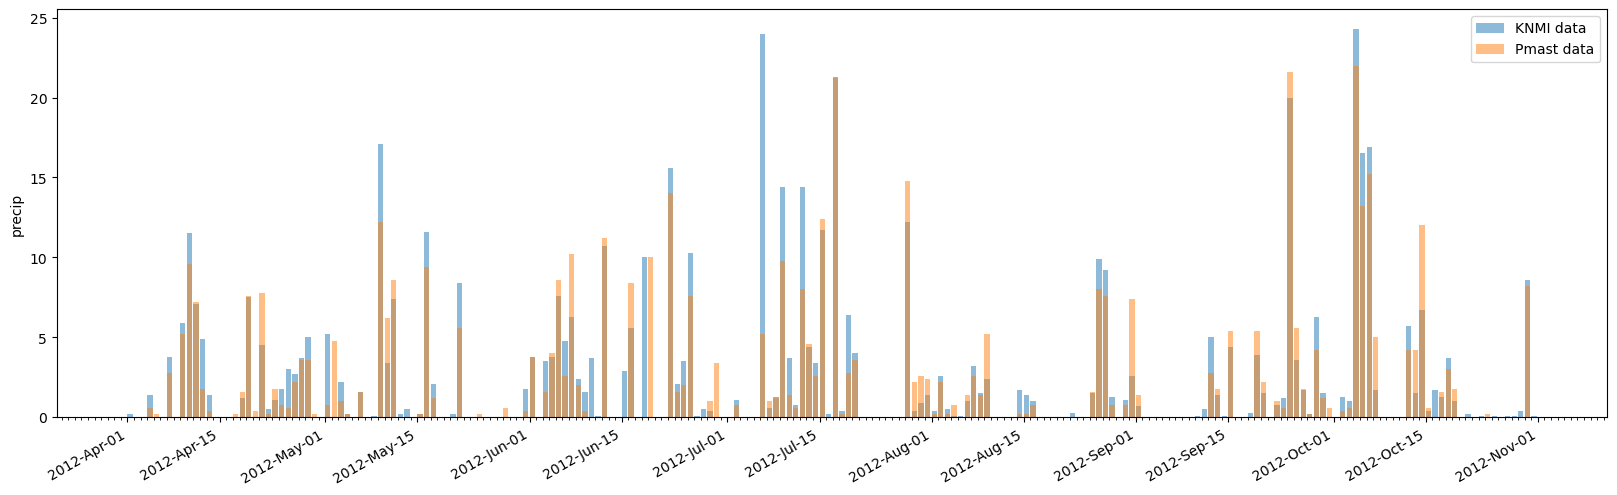

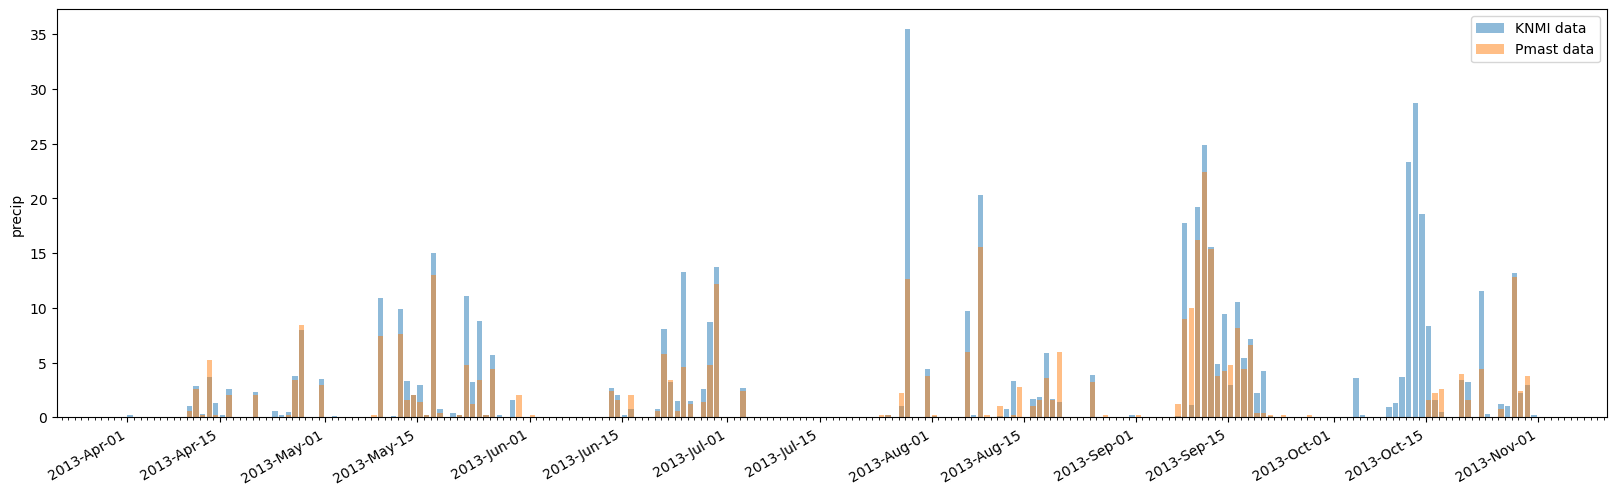

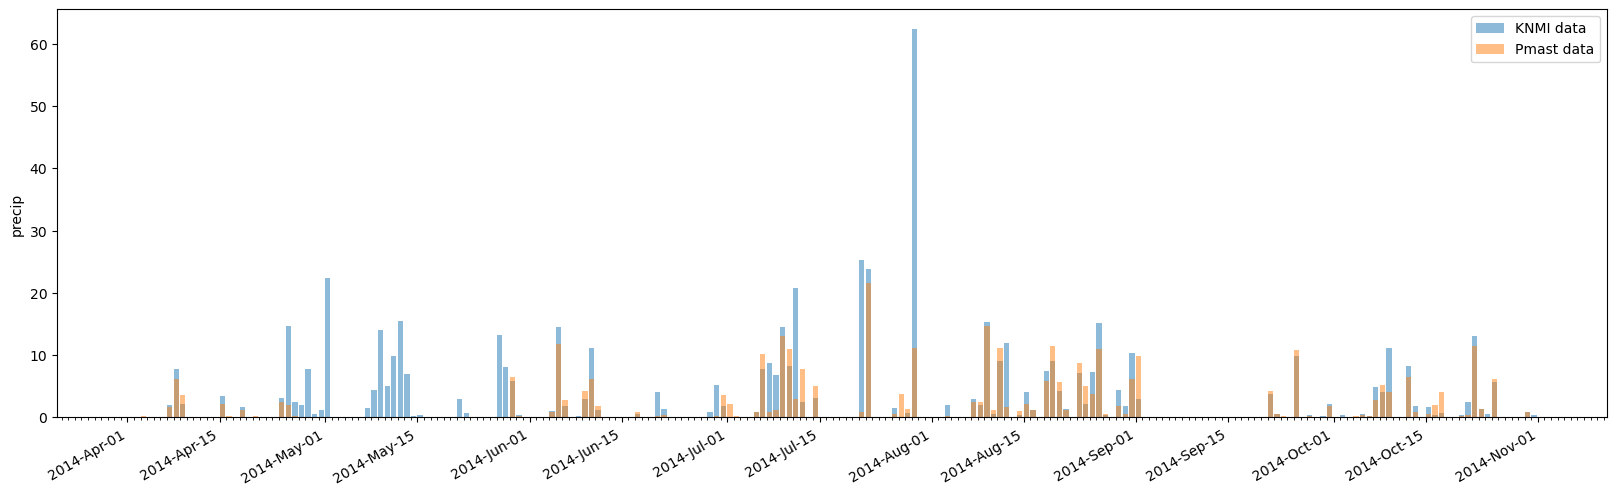

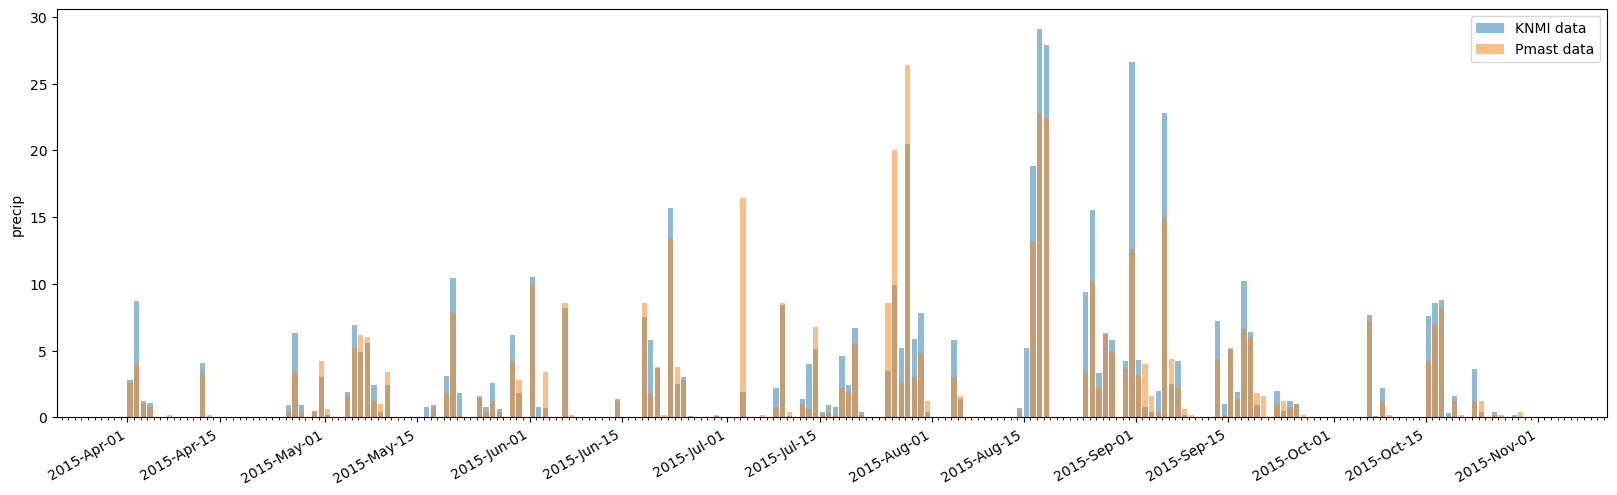

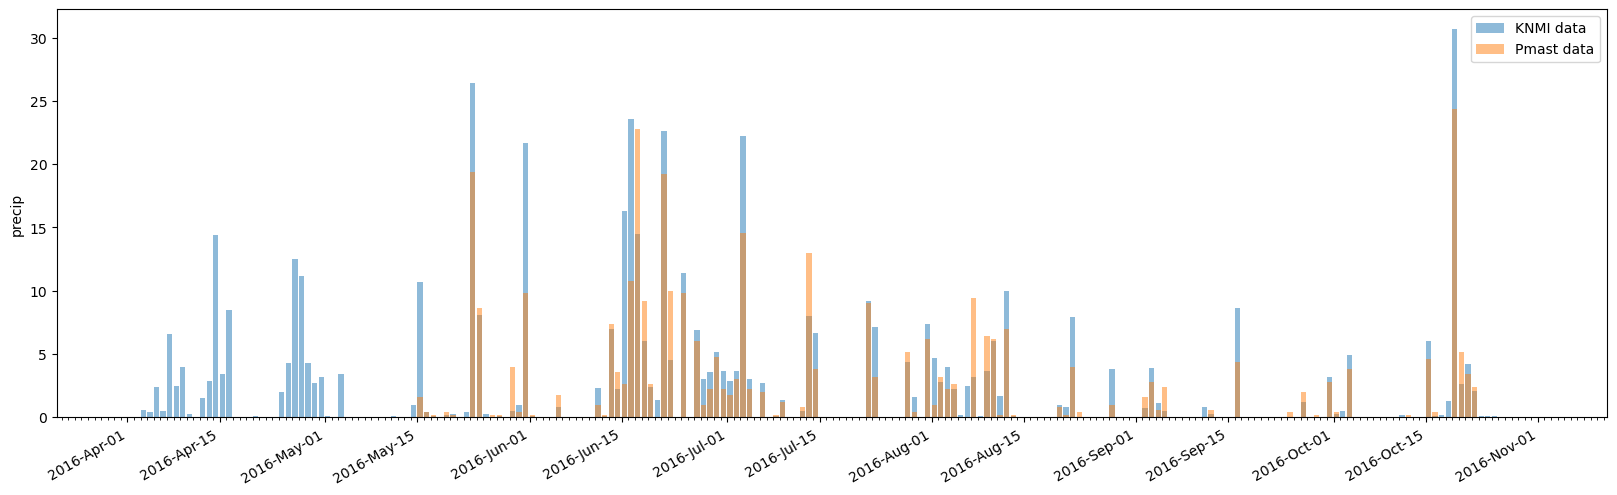

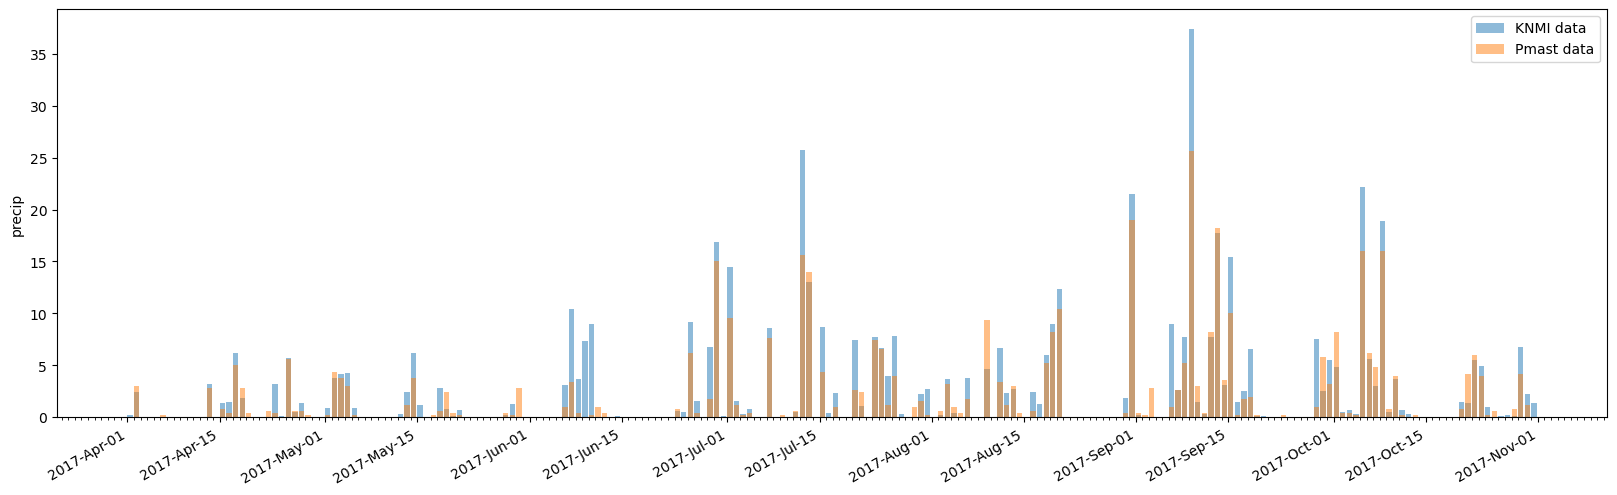

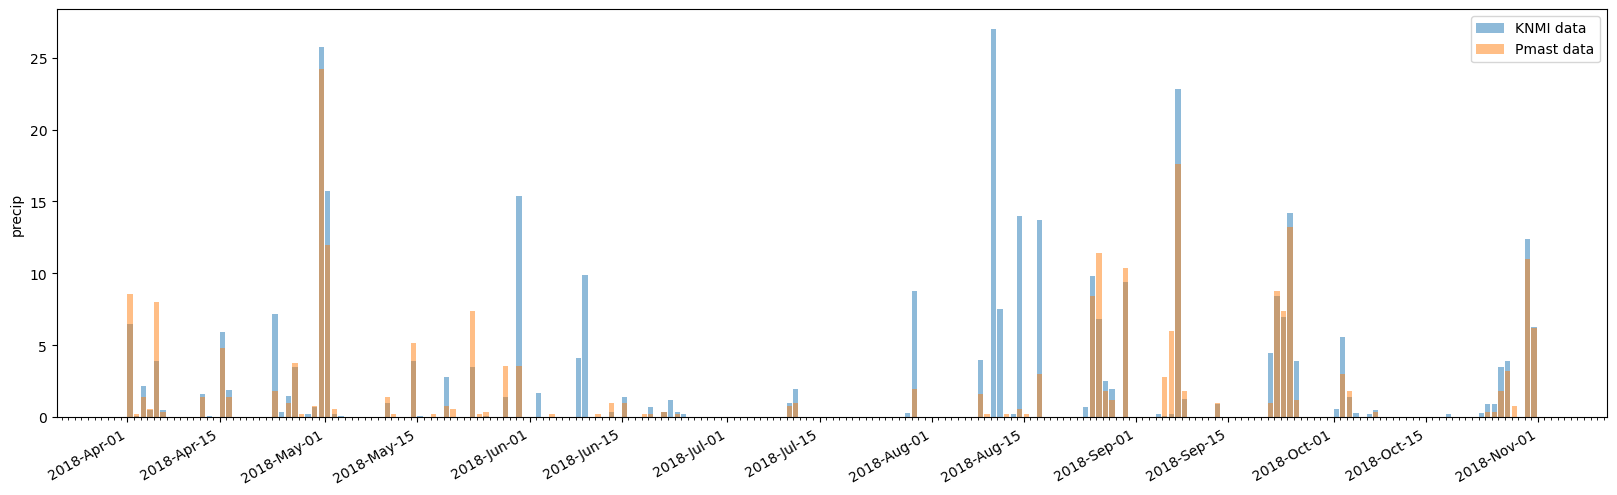

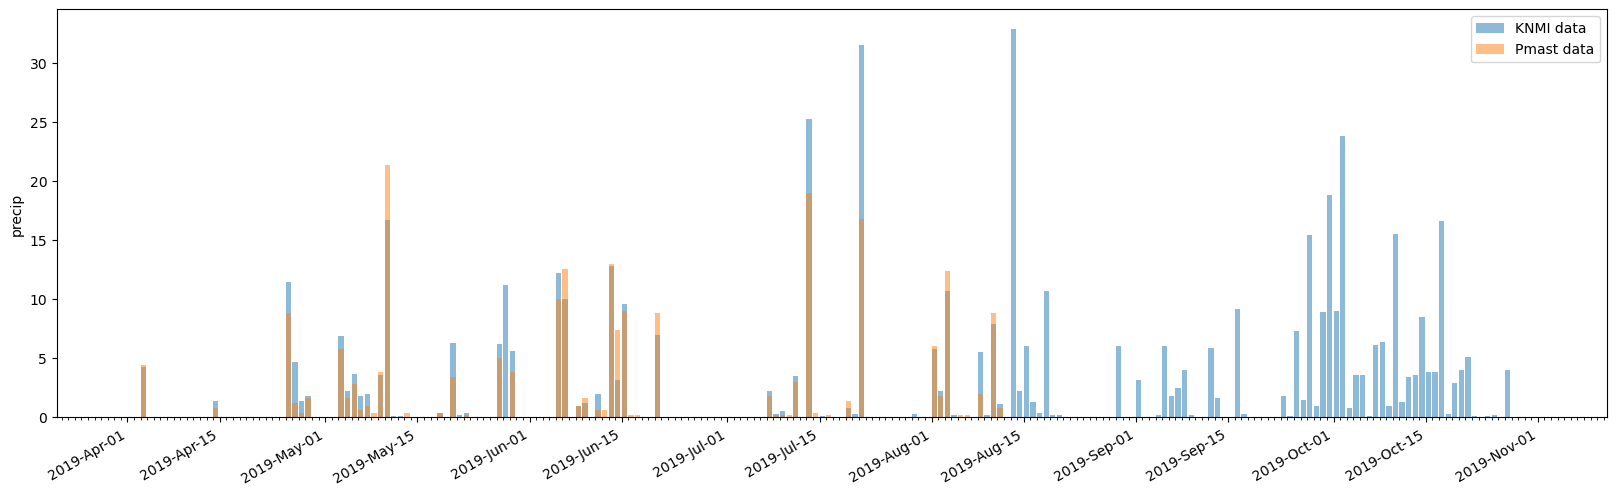

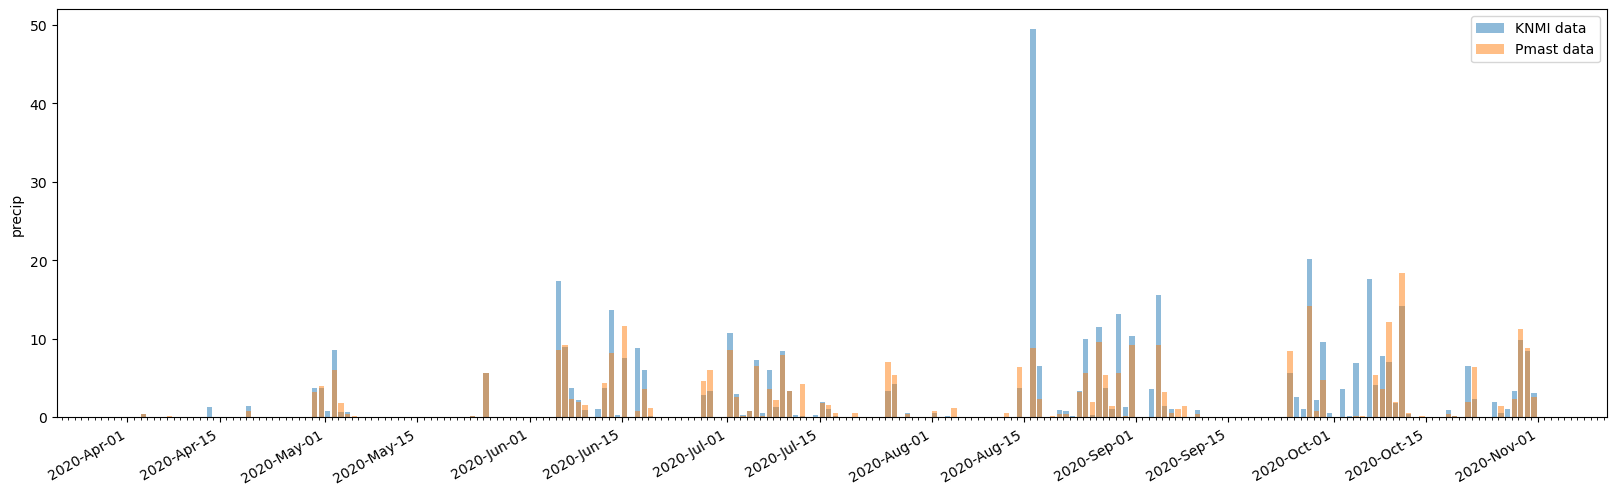

In [18]:
plt.rcParams["figure.figsize"] = (20,6)

#st="2005-04-01"
#ed="2005-09-30"

def precip_plot_wrapper(st,ed):

    fig,ax = plt.subplots()

    a=df_knmi_daily.loc[st:ed,['RD']]
    ax.bar(a.index,a['RD'],alpha=0.5, align='edge', label="KNMI data")

    b=df_Pmast_8to8.loc[st:ed,['P(mast)']]
    ax.bar(b.index,b['P(mast)'],alpha=0.5, align='edge', label="Pmast data")

    ax.set_ylabel("precip")
    
    #ax2 = ax.twinx()
    #ax2.set_ylim(0,5)
    #ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    #ax2.scatter(c.index,c['LE/ET'],c=np.where(c['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
    fig.autofmt_xdate()



for year in range(2001,2021):
    st=str(year)+"-04-01"
    ed=str(year)+"-10-31"
    precip_plot_wrapper(st,ed)